In [2]:
import pandas as pd
import numpy as np

%store -r NEM2021
NEM2021

,Day,BZN|BE > BZN|GB [MW],BZN|GB > BZN|BE [MW]
0,01.01.2021 00:00 - 01.01.2021 00:15,24029.25,0.00
1,02.01.2021 00:00 - 02.01.2021 00:15,23605.25,0.00
2,03.01.2021 00:00 - 03.01.2021 00:15,23762.25,0.00
3,04.01.2021 00:00 - 04.01.2021 00:15,21801.50,0.00
4,05.01.2021 00:00 - 05.01.2021 00:15,14150.00,0.00
...,...,...,...
360,27.12.2021 00:00 - 27.12.2021 00:15,19440.75,0.00
361,28.12.2021 00:00 - 28.12.2021 00:15,24671.75,0.00
362,29.12.2021 00:00 - 29.12.2021 00:15,17466.75,25.25
363,30.12.2021 00:00 - 30.12.2021 00:15,18127.00,705.50


In [5]:
%store -r NEM2022
NEM2022

,Day,BZN|BE > BZN|GB [MW],BZN|GB > BZN|BE [MW]
0,01.01.2022 00:00 - 01.01.2022 00:15,10030.25,7165.00
1,02.01.2022 00:00 - 02.01.2022 00:15,12943.25,3574.00
2,03.01.2022 00:00 - 03.01.2022 00:15,13654.50,3368.75
3,04.01.2022 00:00 - 04.01.2022 00:15,17257.00,148.25
4,05.01.2022 00:00 - 05.01.2022 00:15,20498.25,0.00
...,...,...,...
360,27.12.2022 00:00 - 27.12.2022 00:15,13816.00,3057.50
361,28.12.2022 00:00 - 28.12.2022 00:15,17079.25,2548.75
362,29.12.2022 00:00 - 29.12.2022 00:15,16055.50,1268.50
363,30.12.2022 00:00 - 30.12.2022 00:15,12150.25,5346.25


In [4]:
NEMFlows = pd.concat([NEM2021["BZN|BE > BZN|GB [MW]"], NEM2022["BZN|BE > BZN|GB [MW]"]], ignore_index=True).to_frame("BZN|BE > BZN|GB [MW]")
NEMFlows["BZN|GB > BZN|BE [MW]"] = pd.concat([NEM2021["BZN|GB > BZN|BE [MW]"], NEM2022["BZN|GB > BZN|BE [MW]"]], ignore_index=True).to_frame("BZN|GB > BZN|BE [MW]")

NEMFlows["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "BZN|BE > BZN|GB [MW]", "BZN|GB > BZN|BE [MW]"]

NEMFlows = NEMFlows.reindex(columns=NewOrder)

NEMFlows

,Date,BZN|BE > BZN|GB [MW],BZN|GB > BZN|BE [MW]
0,2021-01-01,24029.25,0.00
1,2021-01-02,23605.25,0.00
2,2021-01-03,23762.25,0.00
3,2021-01-04,21801.50,0.00
4,2021-01-05,14150.00,0.00
...,...,...,...
725,2022-12-27,13816.00,3057.50
726,2022-12-28,17079.25,2548.75
727,2022-12-29,16055.50,1268.50
728,2022-12-30,12150.25,5346.25


(18591.55, 19393.45)


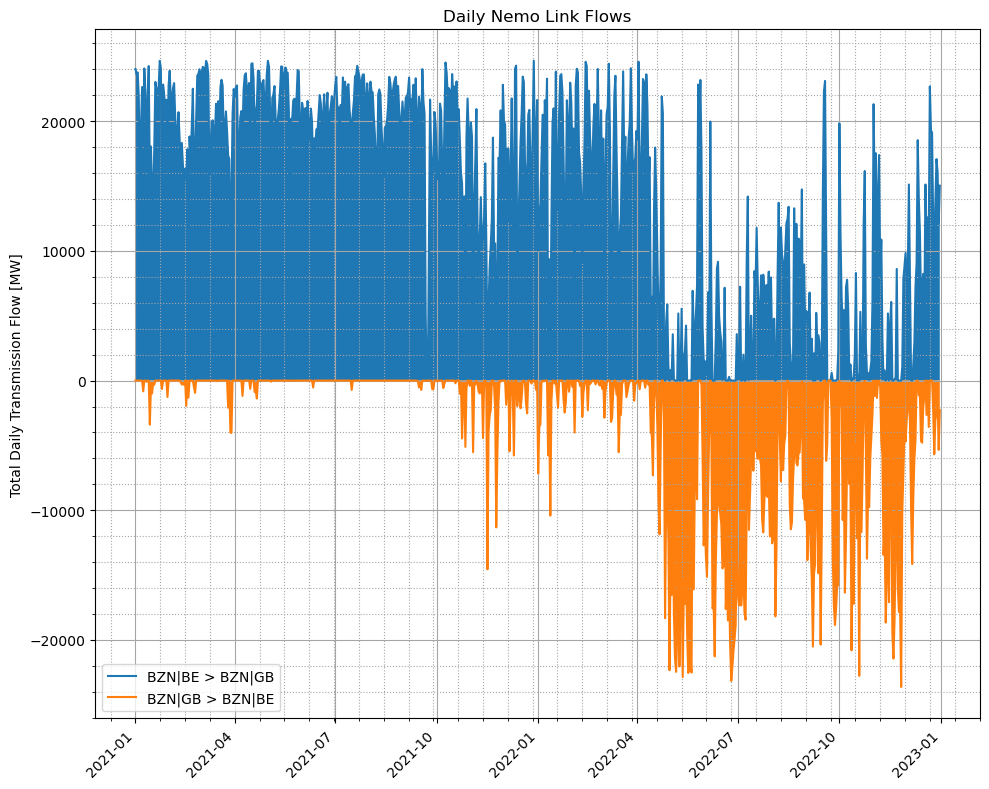

In [4]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import math

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Daily Nemo Link Flows')
plt.ylabel('Total Daily Transmission Flow [MW]')

Mean = (NEMFlows["BZN|BE > BZN|GB [MW]"] - NEMFlows["BZN|GB > BZN|BE [MW]"])/math.sqrt(2)

ax.plot(NEMFlows["Date"], NEMFlows["BZN|BE > BZN|GB [MW]"], label="BZN|BE > BZN|GB")
ax.plot(NEMFlows["Date"], -NEMFlows["BZN|GB > BZN|BE [MW]"], label="BZN|GB > BZN|BE")
#ax.plot(NEMFlows["Date"], Mean, label="RMS", color='black')


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
#plt.xlim(18591.55, 19379.8)
plt.tight_layout()

plt.fill_between(NEMFlows["Date"], NEMFlows["BZN|BE > BZN|GB [MW]"])
plt.fill_between(NEMFlows["Date"], -NEMFlows["BZN|GB > BZN|BE [MW]"])

plt.show()